In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size =1500)
lngs = np.random.uniform(-180,180, size =1500)

# Pack lats and lgns as pairs by zipping them with the zip() function
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unzip lat_lngs to add latitudes and longitudes to a list *ensure you unzip the latitudes and longitudes into the coordinates list before moving on
coordinates = list(lat_lngs)

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create an empty list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination 
# (Iterate through the coordinates list)
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficent count
len(cities)

583

In [8]:
# Import requests library and weather API key
import requests
from config import api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Build the basic url for the OpenWeatherMap with api_key added
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=208373fb6fe08d264cbbc9e9b8bbcebf


In [10]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creat counters
record_count = 1
set_count = 1

# Loop thru all the cities in our list (use enumerate() method to get the index for the city for logging purposes, and the city for creating an endpoint url)
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purpose (Open Weather Map API only allows 60 calls per minute for free tier)
    if (i % 50 == 0 and i >= 50): # if the remainder of index divided by 50 is equal to 0, and if the index is greater than or equal to 50
        set_count += 1
        record_count = 1
        time.sleep(60) # program will pause for 60 secs to avoid time out error
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+") # removing blank spaces within the city name and replacing it with +
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_maxtemp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_maxtemp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass # this will notify program to skip the error city and move on to the next city
        
# Indicate that Data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")
            

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | niort
Processing Record 2 of Set 1 | fairbanks
Processing Record 3 of Set 1 | kadoma
Processing Record 4 of Set 1 | bukama
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | kawalu
Processing Record 12 of Set 1 | foumban
Processing Record 13 of Set 1 | livramento
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | baryshivka
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | leopold
Processing Record 19 of Set 1 | stabat
Processing Record 20 of Set 1 | narsaq
Processing Record 21 of Set 1 | chikoy
City not found. Skipping...
Proc

Processing Record 33 of Set 4 | carauari
Processing Record 34 of Set 4 | kudahuvadhoo
Processing Record 35 of Set 4 | east london
Processing Record 36 of Set 4 | tuatapere
Processing Record 37 of Set 4 | dunmore town
Processing Record 38 of Set 4 | carbonia
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | sciacca
Processing Record 41 of Set 4 | copiapo
Processing Record 42 of Set 4 | tiznit
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | russell
Processing Record 45 of Set 4 | lewistown
Processing Record 46 of Set 4 | nuuk
Processing Record 47 of Set 4 | benavente
Processing Record 48 of Set 4 | waipawa
Processing Record 49 of Set 4 | karratha
Processing Record 50 of Set 4 | prince rupert
Processing Record 1 of Set 5 | pecos
Processing Record 2 of Set 5 | bandundu
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | acarau
Processing Record 5 of Set 5 | rawson
Processing Record 6 of Set 5 | dikson
Processing Record 7 of 

Processing Record 24 of Set 8 | rezekne
Processing Record 25 of Set 8 | glendora
Processing Record 26 of Set 8 | griffith
Processing Record 27 of Set 8 | sobolevo
Processing Record 28 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 29 of Set 8 | haines junction
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | goose creek
Processing Record 32 of Set 8 | liku
Processing Record 33 of Set 8 | ballina
Processing Record 34 of Set 8 | agustin codazzi
Processing Record 35 of Set 8 | pacifica
Processing Record 36 of Set 8 | ixtapa
Processing Record 37 of Set 8 | uglich
Processing Record 38 of Set 8 | benjamin constant
Processing Record 39 of Set 8 | lompoc
Processing Record 40 of Set 8 | skjervoy
Processing Record 41 of Set 8 | billings
Processing Record 42 of Set 8 | poya
Processing Record 43 of Set 8 | fosser
City not found. Skipping...
Processing Record 44 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 8

Processing Record 13 of Set 12 | ambovombe
Processing Record 14 of Set 12 | caldas novas
Processing Record 15 of Set 12 | urumqi
Processing Record 16 of Set 12 | ocean city
Processing Record 17 of Set 12 | orzhytsya
Processing Record 18 of Set 12 | qaqortoq
Processing Record 19 of Set 12 | jaen
Processing Record 20 of Set 12 | goma
Processing Record 21 of Set 12 | margate
Processing Record 22 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 23 of Set 12 | khani
Processing Record 24 of Set 12 | jalaun
Processing Record 25 of Set 12 | larap
Processing Record 26 of Set 12 | mingguang
Processing Record 27 of Set 12 | uray
Processing Record 28 of Set 12 | faya
Processing Record 29 of Set 12 | noumea
Processing Record 30 of Set 12 | sretensk
Processing Record 31 of Set 12 | aksu
Processing Record 32 of Set 12 | vallenar
Processing Record 33 of Set 12 | sydney
----------------------------
Data Retrieval Complete     
----------------------------


In [12]:
len(city_data)

536

In [13]:
# Convert the array of dictionaries into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Niort,46.3333,-0.3333,66.16,91,93,5.01,FR,2022-10-01 13:54:39
1,Fairbanks,64.8378,-147.7164,42.82,93,20,3.44,US,2022-10-01 13:54:40
2,Kadoma,34.7333,135.5833,75.18,55,5,5.75,JP,2022-10-01 13:54:40
3,Bukama,-9.2000,25.8500,95.56,22,96,5.10,CD,2022-10-01 13:54:41
4,Pisco,-13.7000,-76.2167,63.01,67,5,2.30,PE,2022-10-01 13:54:41
5,Rikitea,-23.1203,-134.9692,73.54,71,64,8.61,PF,2022-10-01 13:54:42
6,Saint-Philippe,-21.3585,55.7679,72.99,73,47,9.06,RE,2022-10-01 13:54:42
7,Saint George,37.1041,-113.5841,64.99,45,0,0.00,US,2022-10-01 13:51:01
8,Hermanus,-34.4187,19.2345,68.81,64,100,10.36,ZA,2022-10-01 13:54:43
9,Kawalu,-7.3817,108.2082,73.65,98,99,1.61,ID,2022-10-01 13:54:43


In [15]:
# Reorder dataframe columns
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Niort,FR,2022-10-01 13:54:39,46.3333,-0.3333,66.16,91,93,5.01
1,Fairbanks,US,2022-10-01 13:54:40,64.8378,-147.7164,42.82,93,20,3.44
2,Kadoma,JP,2022-10-01 13:54:40,34.7333,135.5833,75.18,55,5,5.75
3,Bukama,CD,2022-10-01 13:54:41,-9.2000,25.8500,95.56,22,96,5.10
4,Pisco,PE,2022-10-01 13:54:41,-13.7000,-76.2167,63.01,67,5,2.30
5,Rikitea,PF,2022-10-01 13:54:42,-23.1203,-134.9692,73.54,71,64,8.61
6,Saint-Philippe,RE,2022-10-01 13:54:42,-21.3585,55.7679,72.99,73,47,9.06
7,Saint George,US,2022-10-01 13:51:01,37.1041,-113.5841,64.99,45,0,0.00
8,Hermanus,ZA,2022-10-01 13:54:43,-34.4187,19.2345,68.81,64,100,10.36
9,Kawalu,ID,2022-10-01 13:54:43,-7.3817,108.2082,73.65,98,99,1.61


In [16]:
# Create the output file (CSV)
output_file = "weather_data/cities.csv"

# Export the city_data into the CSV
city_data_df.to_csv(output_file, index_label = "City_ID") # Column A in csv will be "City_ID"

In [17]:
# PLOTTING LATITUDE VS OTHER VARIABLES

# Extract relevant field from the dataframe above for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

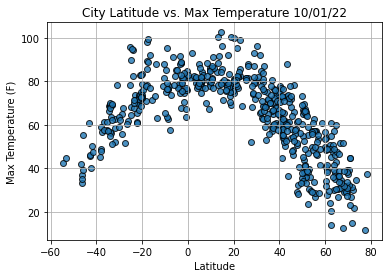

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Set title, x & y label, and grid
plt.title(f"City Latitude vs. Max Temperature " +time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

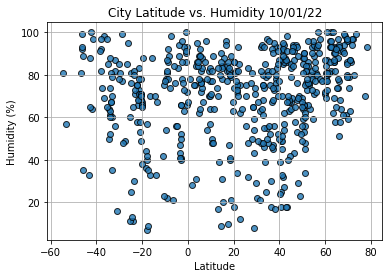

In [20]:
# Build the scatter plot for latitude vs. humidity (repurpose previous code)
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Set title, x & y label, and grid
plt.title(f"City Latitude vs. Humidity " +time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

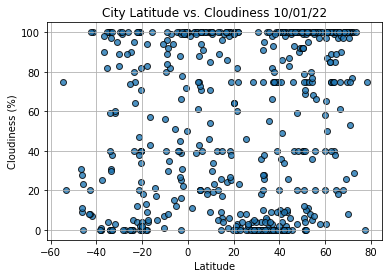

In [21]:
# Build the scatter plot for latitude vs. cloudiness (repurpose previous code)
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Set title, x & y label, and grid
plt.title(f"City Latitude vs. Cloudiness " +time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

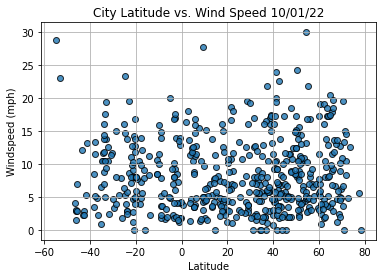

In [22]:
# Build the scatter plot for latitude vs. windspeed (repurpose previous code)
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Set title, x & y label, and grid
plt.title(f"City Latitude vs. Wind Speed " +time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()